In [1]:
### Notebook to look at using the Weight Files

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [34]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

In [38]:
weight = xr.open_dataset('/home/sallen/MEOPAR/grid/weights-continental2.5-hrdps_202108_23feb23onward.nc')

In [39]:
data = xr.open_dataset('/results/forcing/atmospheric/continental2.5/nemo_forcing/hrdps_y2024m03d15.nc')

In [23]:
flat = np.array(data.solar[2]).flatten()

In [24]:
on_new_grid = np.zeros_like(weight.src01)

In [25]:
on_new_grid = on_new_grid + (weight.wgt01 * flat[weight.src01] +
                             weight.wgt02 * flat[weight.src02] +
                             weight.wgt03 * flat[weight.src03] +
                             weight.wgt04 * flat[weight.src04])

/tmp/ipykernel_1215712/398973568.py:5: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  colours = axs[1].pcolormesh(mesh.nav_lon, mesh.nav_lat, on_new_grid, vmax=100, vmin=60)


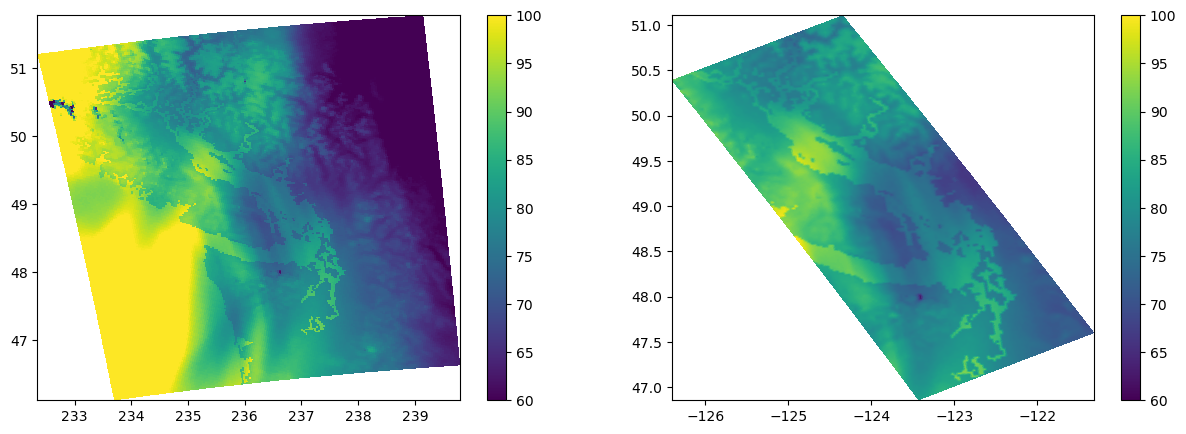

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
colours = axs[0].pcolormesh(data.nav_lon, data.nav_lat, data.solar[2], vmax=100, vmin=60)
fig.colorbar(colours, ax=axs[0])
#data.solar[2].plot(ax=axs[0])
colours = axs[1].pcolormesh(mesh.nav_lon, mesh.nav_lat, on_new_grid, vmax=100, vmin=60)
fig.colorbar(colours, ax=axs[1]);